In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
import os
import mahotas as mh

In [3]:
DATA_DIR = '/raid/mpsych/RISTERLAB/VSOverviewTileSet/Acquired'

In [5]:
z = 560
img = '000000_000000_000'+str(z)+'_000000.tif'

In [12]:
z_img = mh.imread(os.path.join(DATA_DIR,img))

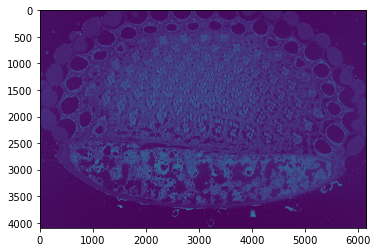

In [13]:
imshow(z_img)

In [14]:
z_img_cropped = z_img[500:2500,1500:4500]

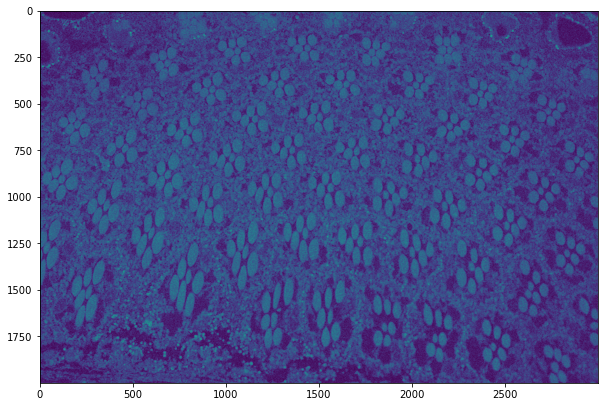

In [16]:
plt.figure(figsize=(10,10))
imshow(z_img_cropped)

In [17]:
z_img_cropped.nbytes

12000000

In [102]:
# load ten images
slices = []
for z in range(550,560):
    img = '000000_000000_000'+str(z)+'_000000.tif'
    z_img = mh.imread(os.path.join(DATA_DIR,img))
    z_img_cropped = z_img[1500:2000,1200:2500].astype(np.float)
    z_img_cropped /= z_img_cropped.max()
    z_img_cropped *= 255
    slices.append(z_img_cropped)

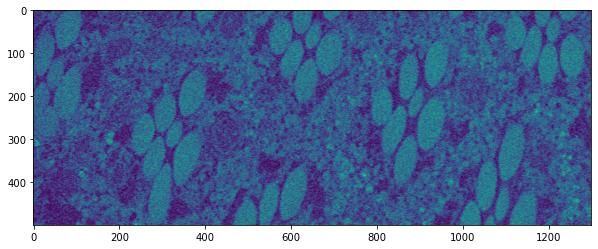

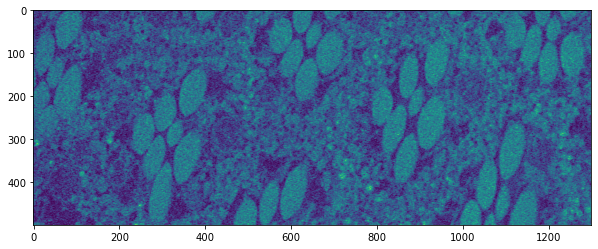

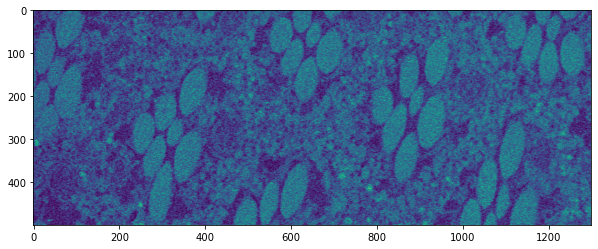

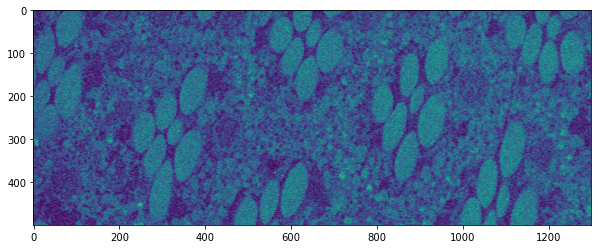

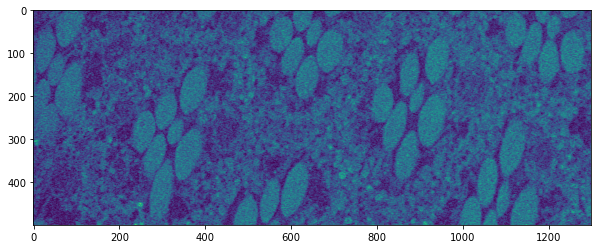

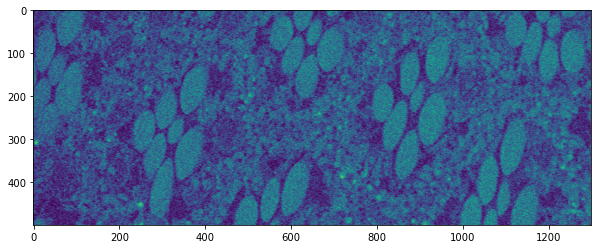

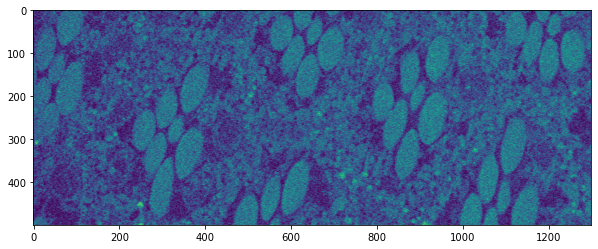

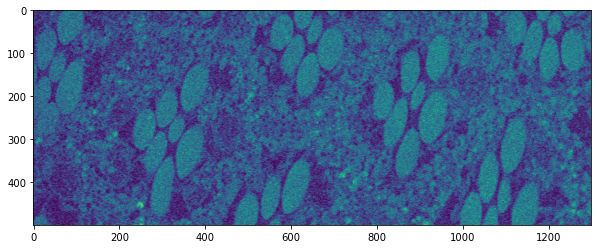

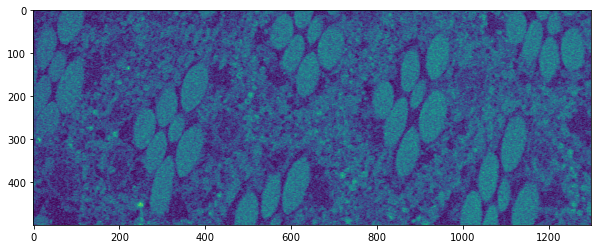

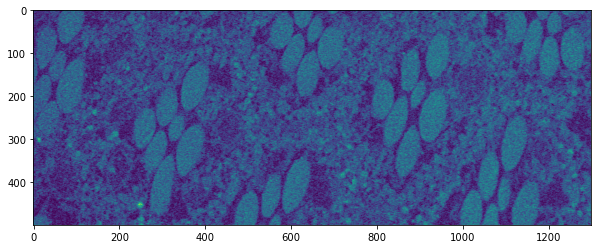

In [103]:
for s in slices:
    plt.figure(figsize=(10,10))
    imshow(s)

In [104]:
s.max()

255.0

In [115]:
c = slices[0].copy()
c[c<100] = 0 # TODO

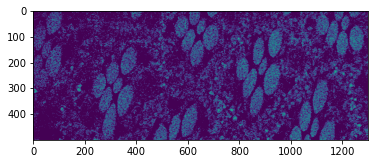

In [116]:
imshow(c)

In [117]:
labeled, number  = mh.label(c)

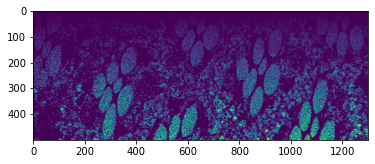

In [118]:
imshow(labeled)

In [119]:
sizes = mh.labeled.labeled_size(labeled)


In [120]:
too_small = np.where(sizes < 10)

In [121]:
labeled_only_big = mh.labeled.remove_regions(labeled, too_small)


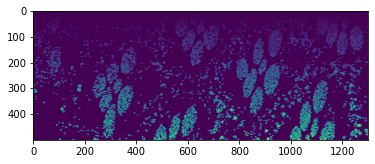

In [122]:
imshow(labeled_only_big)

In [123]:
binary_mask = labeled_only_big.copy()
binary_mask[binary_mask > 0] = 1

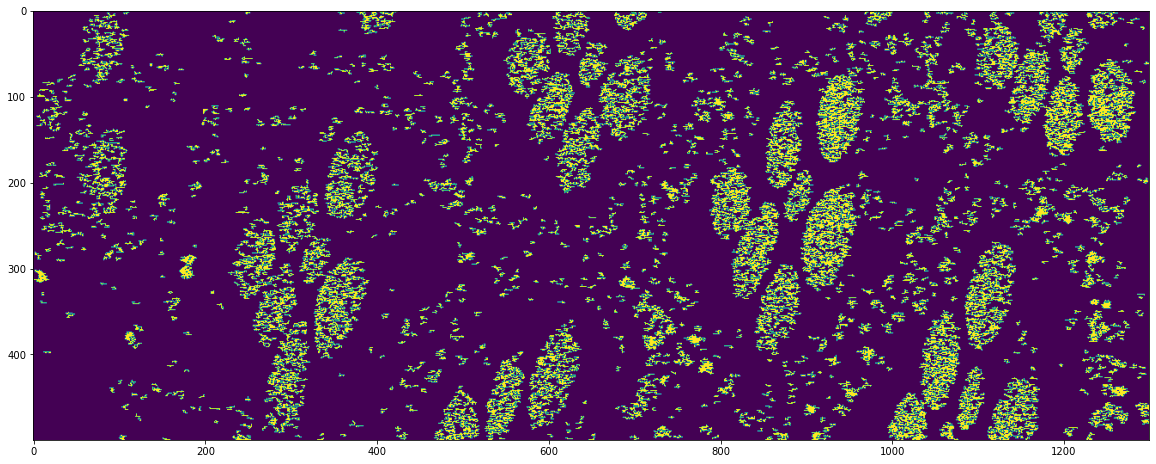

In [124]:
plt.figure(figsize=(20,20))
imshow(binary_mask)

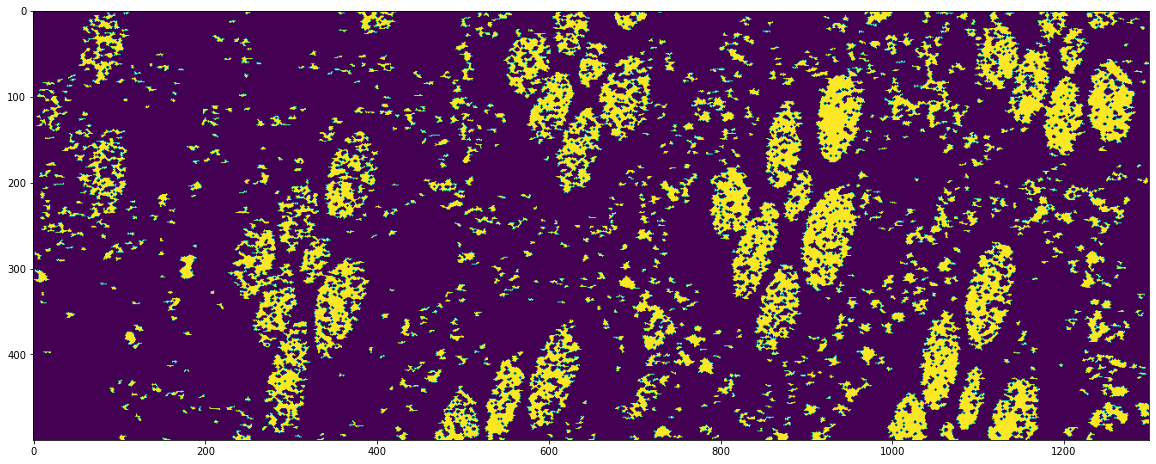

In [125]:
binary_mask_closed = mh.morph.close(binary_mask)

plt.figure(figsize=(20,20))
imshow(binary_mask_closed)

In [126]:
binary_mask_closed_filtered = mh.gaussian_filter(binary_mask_closed, sigma=3)

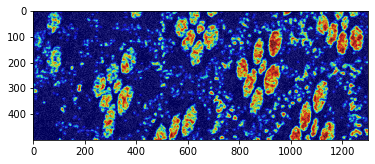

In [127]:
plt.figure()
plt.imshow(slices[0], 'gray', interpolation='none')
plt.imshow(binary_mask_closed_filtered, 'jet', interpolation='none', alpha=0.7)
plt.show()

In [128]:
binary_mask_open = mh.morph.close_holes(binary_mask_closed_filtered)

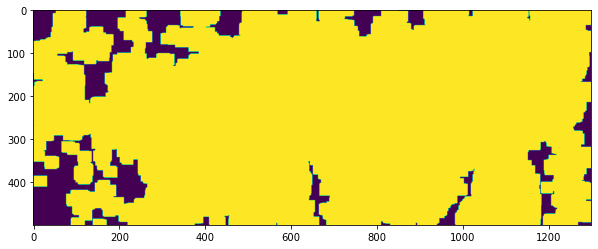

In [129]:
plt.figure(figsize=(10,10))
imshow(binary_mask_open)

In [70]:
for i in range(5):
  binary_mask_open = mh.morph.erode(binary_mask_open)

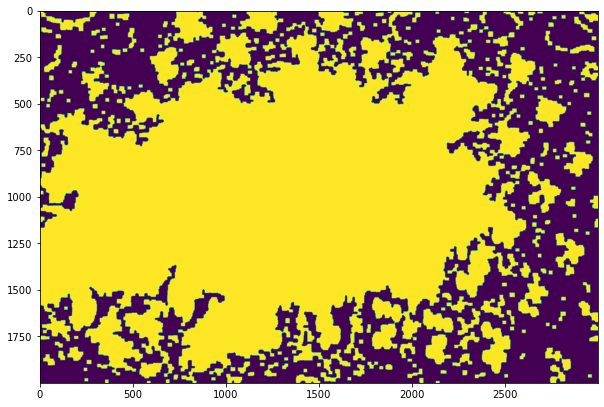

In [71]:
plt.figure(figsize=(10,10))
imshow(binary_mask_open)